[YYYYMMDD]

# 2. Model 3

Try seasonal

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation

In [3]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from statsmodels.tsa.arima.model import ARIMA
import sys
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
from ramal import eval_model, jampi

In [4]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_1'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [5]:
ts2 = joblib.load(PATH_MODEL+'ramal_1:92.pkl')

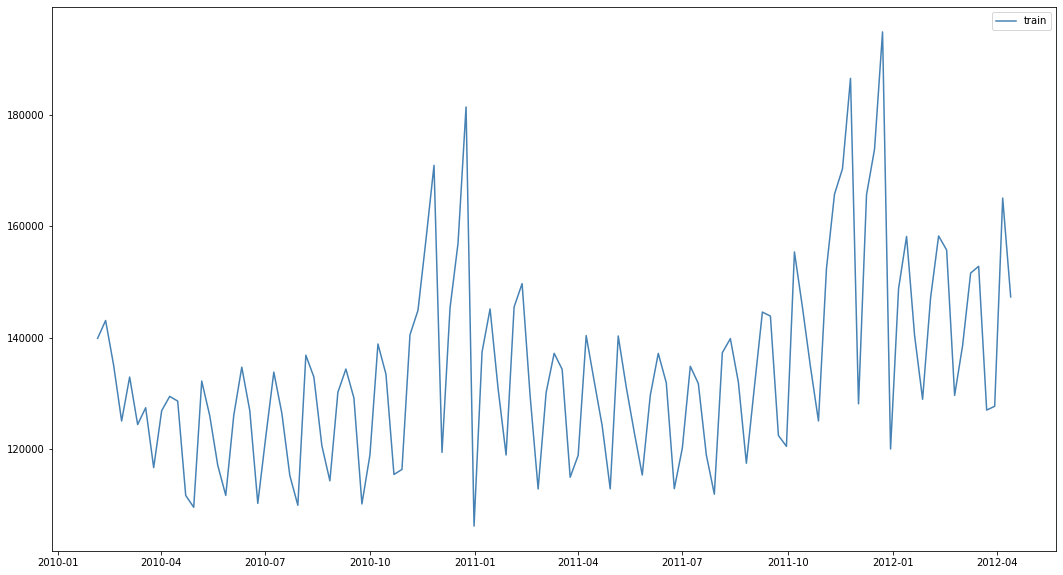

In [8]:
ts2.plot()

## Model 1

In [14]:
model1 = ARIMA(ts2.data, order=(3,1,2), seasonal_order=(1, 1, 1, 5))
# model1 = ARIMA(ts2.data, order=(3,1,2))
arima_model1 = model1.fit()
print(arima_model1.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                            wsales   No. Observations:                  115
Model:             ARIMA(3, 1, 2)x(1, 1, [1], 5)   Log Likelihood               -1215.452
Date:                           Thu, 25 Aug 2022   AIC                           2446.903
Time:                                   13:21:31   BIC                           2468.434
Sample:                               02-05-2010   HQIC                          2455.635
                                    - 04-13-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7776      0.248     -3.136      0.002      -1.264      -0.292
ar.L2         -0.7584      0.161     -4.719

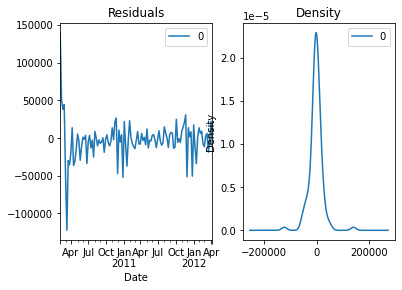

In [15]:
residuals = pd.DataFrame(arima_model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Eval

In [16]:
train_pred_wrap = arima_model1.get_prediction()

In [18]:
train_pred_wrap.summary_frame()

wsales,mean,mean_se,mean_ci_lower,mean_ci_upper
2010-02-05,0.000000,27451.592639,-53804.132890,53804.132890
2010-02-12,91696.210205,25751.888354,41223.436497,142168.983912
2010-02-19,97009.489329,24402.553526,49181.363288,144837.615371
2010-02-26,80632.349860,22238.728331,37045.243269,124219.456451
2010-03-05,182358.961204,20702.021839,141783.743993,222934.178414
...,...,...,...,...
2012-03-16,146729.526235,17304.525610,112813.279271,180645.773200
2012-03-23,145666.267174,17304.339599,111750.384784,179582.149563
2012-03-30,130494.600192,17304.252193,96578.889114,164410.311271
2012-04-06,142854.272539,17304.142674,108938.776114,176769.768965


In [19]:
# train_pred_wrap.conf_int()

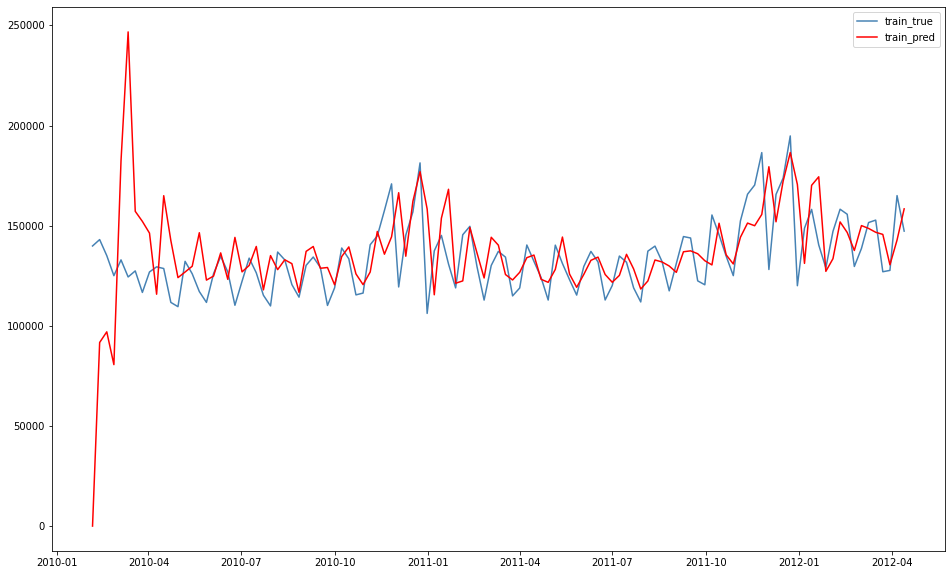

In [20]:
df_data_train = ts2.data
df_train_pred = train_pred_wrap.predicted_mean

## in sample
plt.figure(figsize=(16,10))
plt.plot(ts2.data, label='train_true', color='steelblue')

plt.plot(df_train_pred, label='train_pred', color='red')
plt.legend()

In [23]:
eval_model(ts2.data_1d()[5:], df_train_pred[5:])

{'MAE': 13244.025816137351,
 'MAPE': 0.10201600363146811,
 'MSE': 420448074.315934,
 'over_est_0': 0.5909090909090909,
 'under_est_0': 0.4090909090909091,
 'R2': -0.3546598251474975}

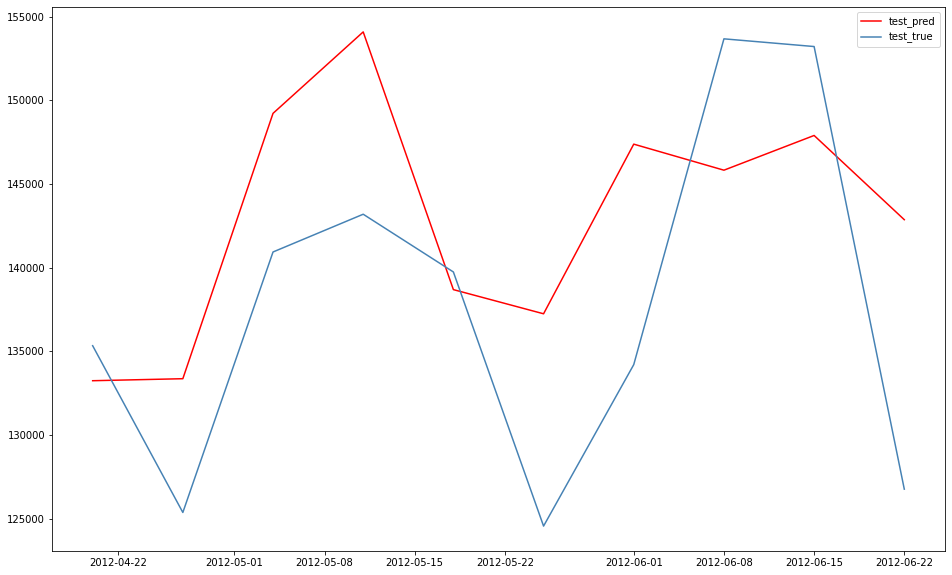

In [24]:
n_test = 10

df_data_test = ts2.data_test[:n_test]
df_test_pred = arima_model1.forecast(steps=n_test)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [25]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 8545.417185312017,
 'MAPE': 0.06344939917118304,
 'MSE': 94055884.46208331,
 'over_est_0': 0.6,
 'under_est_0': 0.4,
 'R2': 0.062254044154277044}